VIRTUAL TELESCOPE This notebook load a set of test predictions and plot the 2d histogram and 90 c.l. limit on a white background and with colorbar. Currently used on experiment 12

In [1]:
import numpy as np
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.interpolate import interp2d

In [2]:
plot_dir = '/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/results/plots/'

In [3]:
def plot_histogram(Y_test, Y_pred, mask_by_confidence=False, title='Model', savefig=None):
    from scipy.interpolate import interp2d

    H, xedges, yedges = np.histogram2d(np.log10(Y_test.flatten()), 
                                       np.log10(Y_pred.flatten()), 
                                       bins=64, range=[[-3,3],[-3,3]], normed=False)
    Hnorm = H/H.sum()

    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.log10(Hnorm.T+1e-20), origin='lower', clim=(-8,0), 
               extent=(xedges.min(), xedges.max(), yedges.min(), yedges.max()),
               cmap='jet', aspect='equal', interpolation='nearest')
    plt.xlabel('Log10 Intensity [Ground Truth]',fontsize=20)
    plt.ylabel('Log10 Intensity [Predicted]', fontsize=20)
    plt.title(title, fontsize=20)
    plt.colorbar()
    Hcum = Hnorm.copy()
    for i in range(Hnorm.shape[1]):
        Hcum[:,i]=H[:,i].cumsum(axis=0)/H[:,i].sum()
    Hcum[np.where(np.isnan(Hcum))] = 1.0

    mask = np.ones(Hcum.shape)
    mask[np.where(np.abs(Hcum-0.5) <= 0.45)] = np.nan
    if mask_by_confidence:
        plt.imshow(mask.T,extent=(xedges.min(), xedges.max(), yedges.min(), yedges.max()),
               origin='lower', cmap='gray', alpha=1.0) #,[0.05,0.95],linethick=2)
    plt.plot([-3,3],[-3,3], linewidth=3)
    if savefig == None:
        plt.show()
    else:
        plt.savefig(savefig)

In [5]:
def plot_histogram(Y_test, Y_pred, mask_by_confidence=False, title='Model', savefig=None, clower=-8):
    H, xedges, yedges = np.histogram2d(np.log10(Y_test.flatten()), 
                                       np.log10(Y_pred.flatten()), 
                                       bins=200, range=[[-3,3.0],[-3,3.0]], normed=False)
    Hnorm = H/H.sum()

    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot([-3,3],[-3,3], linewidth=3)
    plt.title(title, fontsize=20)
    divider = make_axes_locatable(ax)
    im = ax.imshow(np.log10(Hnorm.T+1e-20), origin='lower', clim=(clower,0), 
               extent=(xedges.min(), xedges.max(), yedges.min(), yedges.max()),
               cmap='jet', aspect='equal', interpolation='none')
    cax = divider.append_axes('right', size='5%', pad=0.07)
    ax.set_xlabel('Log10 Real Intensity',fontsize=20)
    ax.set_ylabel('Log10 Predicted Intensity', fontsize=20)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    Hcum = Hnorm.copy()
    for i in range(Hnorm.shape[1]):
        Hcum[:,i]=H[:,i].cumsum(axis=0)/H[:,i].sum()
    Hcum[np.where(np.isnan(Hcum))] = 1.0
    mask = np.ones(Hcum.shape)
    mask[np.where(np.abs(Hcum-0.5) <= 0.45)] = np.nan
    if mask_by_confidence:
        ax.imshow(mask.T,extent=(xedges.min(), xedges.max(), yedges.min(), yedges.max()),
               origin='lower', cmap='binary', alpha=1.0)
    #ax.tick_params(axis='x', colors='white')
    #ax.tick_params(axis='y', colors='white')
    #ax.yaxis.label.set_color('white')
    #ax.xaxis.label.set_color('white')
    #ax.spines['bottom'].set_color('white')
    #ax.spines['top'].set_color('white') 
    #ax.spines['right'].set_color('white')
    #ax.spines['left'].set_color('white')
    plt.tick_params(axis='both', which='major', size=15)
    if savefig == None:
        plt.show()
    else:
        plt.savefig(savefig)

/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


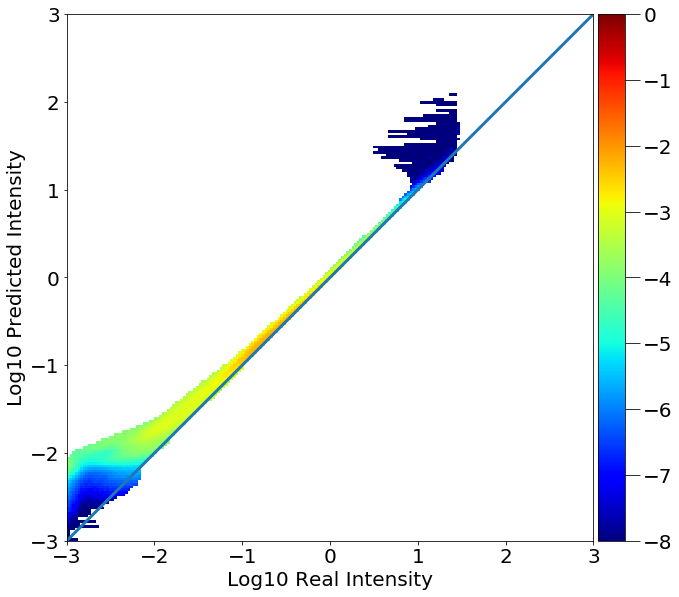

In [6]:
model = 'v_experiment_12'
base = '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/experiments_results_vt'

img_file = '2dhist_{}_lowerbound3.png'.format(model)
img_file = plot_dir + img_file

file = base+'/'+model+'/0300_'+model+'_test_predictions.npy'
Y = np.load(file)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]
plot_histogram(Y_test,Y_pred, mask_by_confidence=True, title='', savefig=img_file)

/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


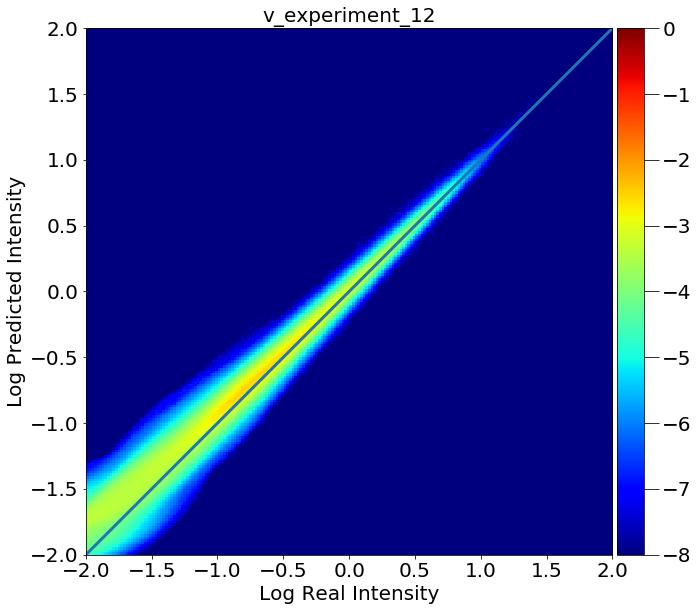

In [6]:
img_file = '2dhist_noclmask{}.png'.format(model)
img_file = plot_dir + img_file

plot_histogram(Y_test,Y_pred, mask_by_confidence=False, title=model, savefig=img_file)

/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


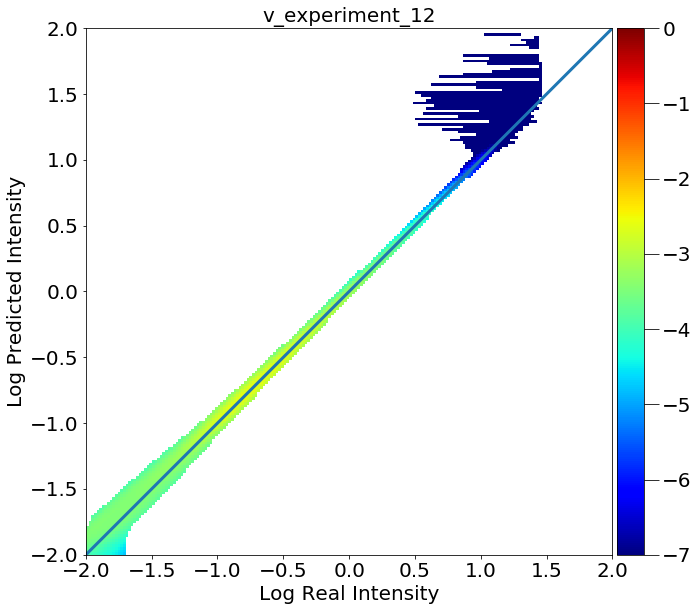

In [47]:
# we have 1734 images of size 512x512, a density of 10^-8 corresponds to about 5 pixels ...
# 10^-7 corresponds to about 45 pixels, is this right?? this is joint PDF

# don't understand how cmap works ... the following was meant to skip values less dense than 10-8, 
# but it doesn't seem to work
plot_histogram(Y_test,Y_pred, mask_by_confidence=True, clower=-7, title=model)

/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/gpfs_gl4_16mb/b9p111/b9p111ap/fdl_sw/conda/envs/wmlce_py3_sdo/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


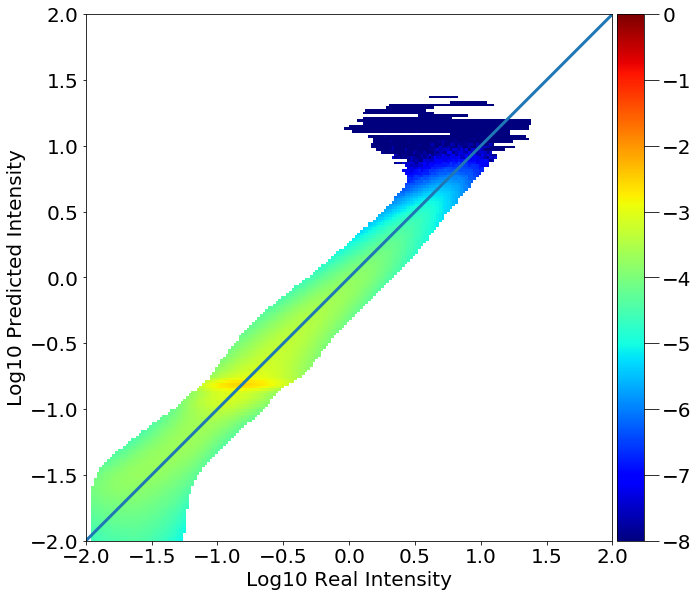

In [11]:
model = 'mark_linear_l1loss'
base = '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/experiments_results_vt'

img_file = '2dhist_{}.png'.format(model)
img_file = plot_dir + img_file

file = base+'/'+model+'/0600_'+model+'_test_predictions.npy'
Y = np.load(file)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]
plot_histogram(Y_test,Y_pred, mask_by_confidence=True, title='', savefig=img_file)